# N-Queen
- `유형` 연습문제


- `문제 설명`


가로, 세로 길이가 n인 정사각형으로된 체스판이 있습니다. 체스판 위의 n개의 퀸이 서로를 공격할 수 없도록 배치하고 싶습니다.

예를 들어서 n이 4인경우 다음과 같이 퀸을 배치하면 n개의 퀸은 서로를 한번에 공격 할 수 없습니다.

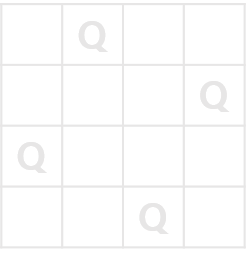

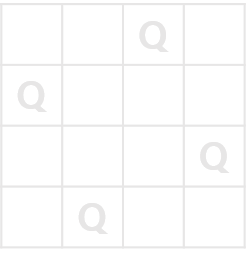

체스판의 가로 세로의 세로의 길이 n이 매개변수로 주어질 때, n개의 퀸이 조건에 만족 하도록 배치할 수 있는 방법의 수를 return하는 solution함수를 완성해주세요.


- `제한 조건`
    - 퀸(Queen)은 가로, 세로, 대각선으로 이동할 수 있습니다.
    - n은 12이하의 자연수 입니다.
    

- `입력`
    - ex1) 4


- `출력`
    - ex1) 2
    
- `참고`
    - [[백준] 9663번 N-Queen - 파이썬(Python)](https://seongonion.tistory.com/103)
    - [[프로그래머스 LV3] N-Queen](https://velog.io/@j_aion/%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%A8%B8%EC%8A%A4-LV3-N-Queen)
    - [[3주차 - Searching] N-Queen (좌표 이용을 시도한 풀이)](https://camel-it.tistory.com/123)

In [70]:
def solution(n):
    global answer
    answer = 0
    col = [True] * n
    diagonal1 = [True] * (2 * n - 1)
    diagonal2 = [True] * (2 * n - 1)

    def check_queen(x, y):
        return col[y] and diagonal1[x + y] and diagonal2[x - y + n - 1]

    def dfs(x):
        global answer
        if x == n:
            answer += 1
        else:
            for idx in range(n):
                if check_queen(x, idx):
                    col[idx] = False
                    diagonal1[x + idx] = False
                    diagonal2[x - idx + n - 1] = False
                    dfs(x + 1)
                    col[idx] = True
                    diagonal1[x + idx] = True
                    diagonal2[x - idx + n - 1] = True

    dfs(0)
    return answer

print(solution(4))
print(solution(5))
print(solution(6))
print(solution(7))
print(solution(8))
print(solution(9))
print(solution(10))
print(solution(11))
print(solution(12))

2
10
4
40
92
352
724
2680
14200


In [122]:
n = 6
lst = [[x, y] for x in range(n) for y in range(n)]

def possible(x1, y1, lst):
    
    for i in range(len(lst)):
        x2, y2 = lst[i][0], lst[i][1]
        
        # 대각선에 위치한 원소 제거
        if abs(x1-x2) == abs(y1-y2):
            lst[i] = 0
 
        # 상하좌우에 위치한 원소 제거
        if (x1 == x2) or (y1 == y2):
            lst[i] = 0
    
    while 0 in lst:
        lst.remove(0)
    
    return lst

a = possible(0, 1, lst)
a
# b = possible(1, 3, a)

# c = possible(2, 0, b)
# c

[[1, 3],
 [1, 4],
 [1, 5],
 [2, 0],
 [2, 2],
 [2, 4],
 [2, 5],
 [3, 0],
 [3, 2],
 [3, 3],
 [3, 5],
 [4, 0],
 [4, 2],
 [4, 3],
 [4, 4],
 [5, 0],
 [5, 2],
 [5, 3],
 [5, 4],
 [5, 5]]

In [116]:
# cols = [1, 2, 3, 4, 5]
lst = possible(0, 1, 4)
for j in range(1, 4):
    temp = [i for i in lst if i[0]==j]
    print(temp)
    
#     y = a[i][1]
#     if y in cols:
#         cols.remove(y)
#     else:


[[1, 3]]
[[2, 0], [2, 2]]
[[3, 0], [3, 2], [3, 3]]


In [117]:
n = int(input())

ans = 0
row = [0] * n

def is_promising(x): # x -> 행
    for i in range(x): # x까지의 행에 대해서..
        if row[x] == row[i] or abs(row[x] - row[i]) == abs(x - i):
            print(f'{row} / ({(x, row[x])}, {(i, row[i])}) -> not p')
            return False
    return True

def n_queens(x):
    print(f'x = {x}')
    global ans
    if x == n: # n = 4 
        ans += 1
        print(f'---------- ans = {ans}')
        return
    else:
        for i in range(n): # 0, 1, 2, 3
            row[x] = i # [x, i]에 퀸을 놓겠다! (x행, 0~3열) -> 0~3열 사이에서 유망하다고 판단하면 그 뒤의 열은 고려하지 않음
            if is_promising(x):
                print(f'{row} / ({x}, {i}) -> p')
                n_queens(x+1)
                
n_queens(0)
print(ans)

4
x = 0
[0, 0, 0, 0] / (0, 0) -> p
x = 1
[0, 0, 0, 0] / ((1, 0), (0, 0)) -> not p
[0, 1, 0, 0] / ((1, 1), (0, 0)) -> not p
[0, 2, 0, 0] / (1, 2) -> p
x = 2
[0, 2, 0, 0] / ((2, 0), (0, 0)) -> not p
[0, 2, 1, 0] / ((2, 1), (1, 2)) -> not p
[0, 2, 2, 0] / ((2, 2), (0, 0)) -> not p
[0, 2, 3, 0] / ((2, 3), (1, 2)) -> not p
[0, 3, 3, 0] / (1, 3) -> p
x = 2
[0, 3, 0, 0] / ((2, 0), (0, 0)) -> not p
[0, 3, 1, 0] / (2, 1) -> p
x = 3
[0, 3, 1, 0] / ((3, 0), (0, 0)) -> not p
[0, 3, 1, 1] / ((3, 1), (1, 3)) -> not p
[0, 3, 1, 2] / ((3, 2), (2, 1)) -> not p
[0, 3, 1, 3] / ((3, 3), (0, 0)) -> not p
[0, 3, 2, 3] / ((2, 2), (0, 0)) -> not p
[0, 3, 3, 3] / ((2, 3), (1, 3)) -> not p
[1, 3, 3, 3] / (0, 1) -> p
x = 1
[1, 0, 3, 3] / ((1, 0), (0, 1)) -> not p
[1, 1, 3, 3] / ((1, 1), (0, 1)) -> not p
[1, 2, 3, 3] / ((1, 2), (0, 1)) -> not p
[1, 3, 3, 3] / (1, 3) -> p
x = 2
[1, 3, 0, 3] / (2, 0) -> p
x = 3
[1, 3, 0, 0] / ((3, 0), (2, 0)) -> not p
[1, 3, 0, 1] / ((3, 1), (0, 1)) -> not p
[1, 3, 0, 2] / (3, 2) -

In [8]:
# SOL 1)

# 1. 퀸을 놓을 수 있는지 판단하는 함수
def is_promising(x):
    for i in range(x):
        if row[x] == row[i] or abs(row[x]-row[i]) == abs(x-i):
            return False
    return True

def search(x, n):
    ans = 0
    if x == n:
        ans += 1
        return
    else:
        for i in range(n):
            row[x] = i
            if is_promising(x):
                solution(x+1)
    return ans

def solution(n):
    row = [0] * n
    return search(n)

In [5]:
print(solution(4))

RecursionError: maximum recursion depth exceeded in comparison